In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
from scipy import stats as st
from statannotations.Annotator import Annotator
import motorpyrimitives as mp

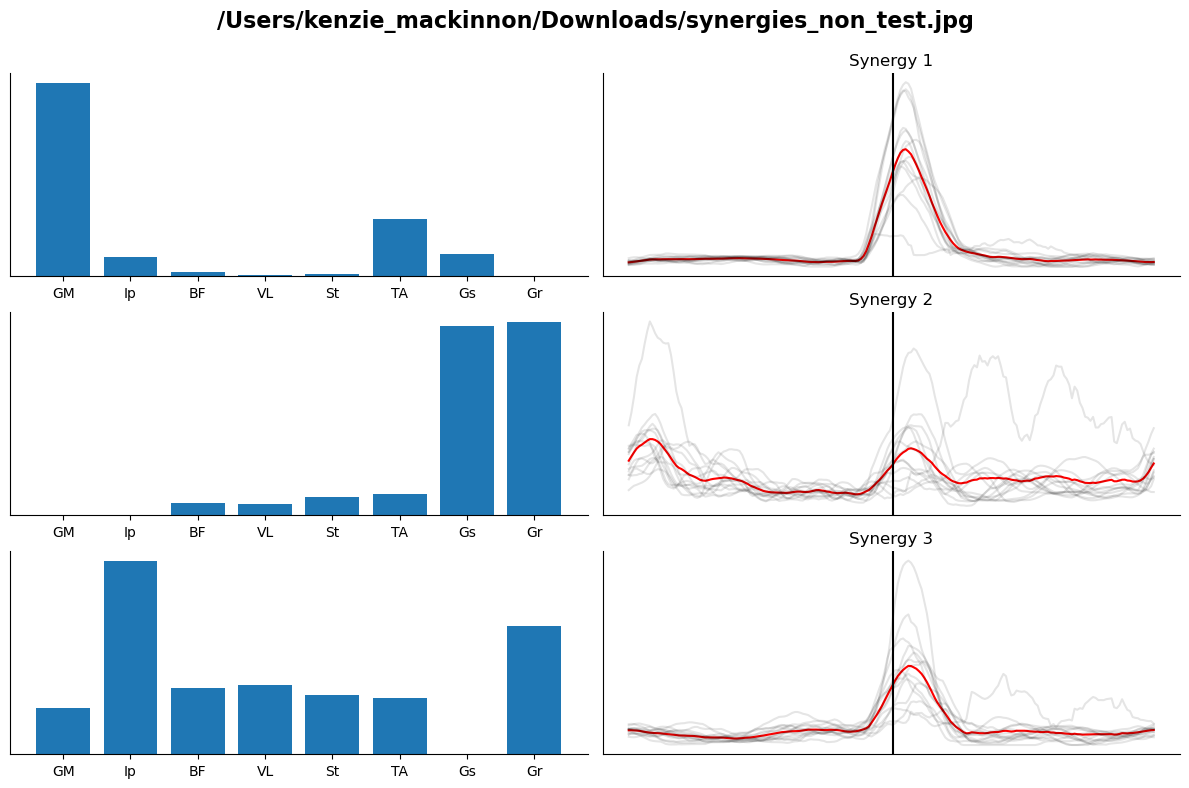

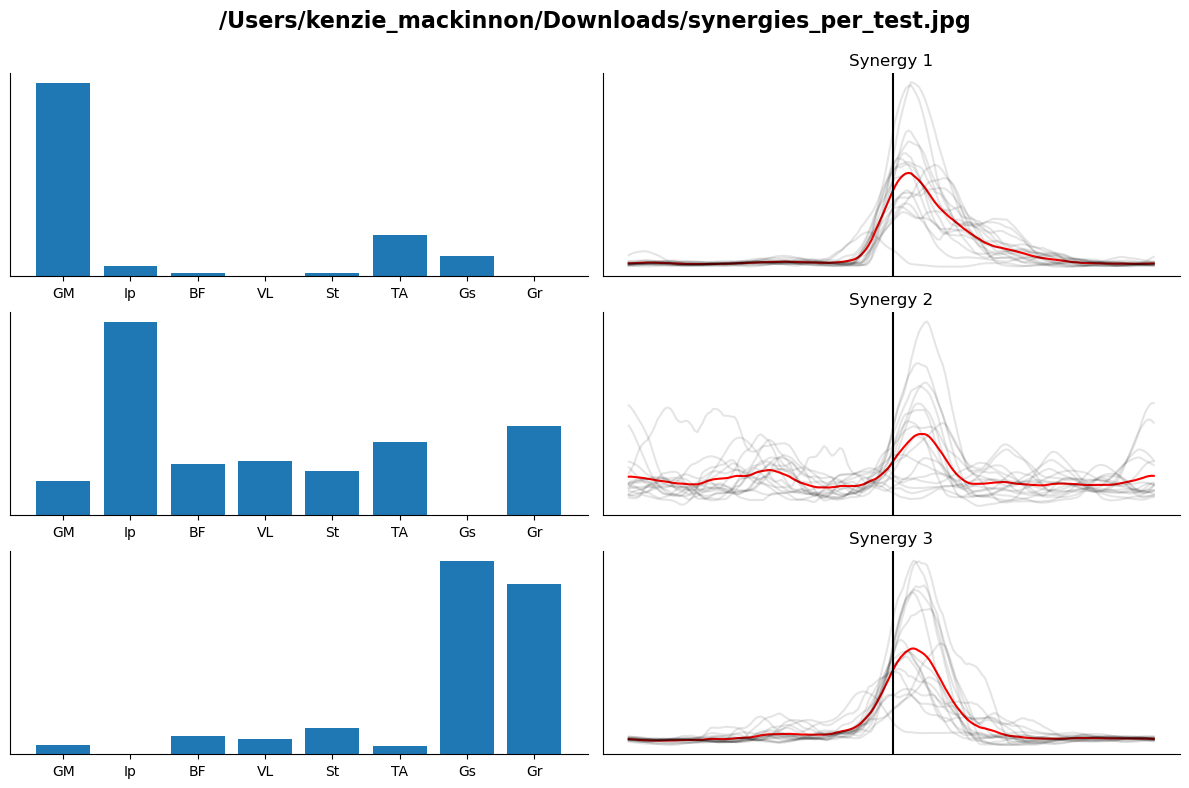

/home/kenzie_mackinnon/miniforge/envs/lab/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


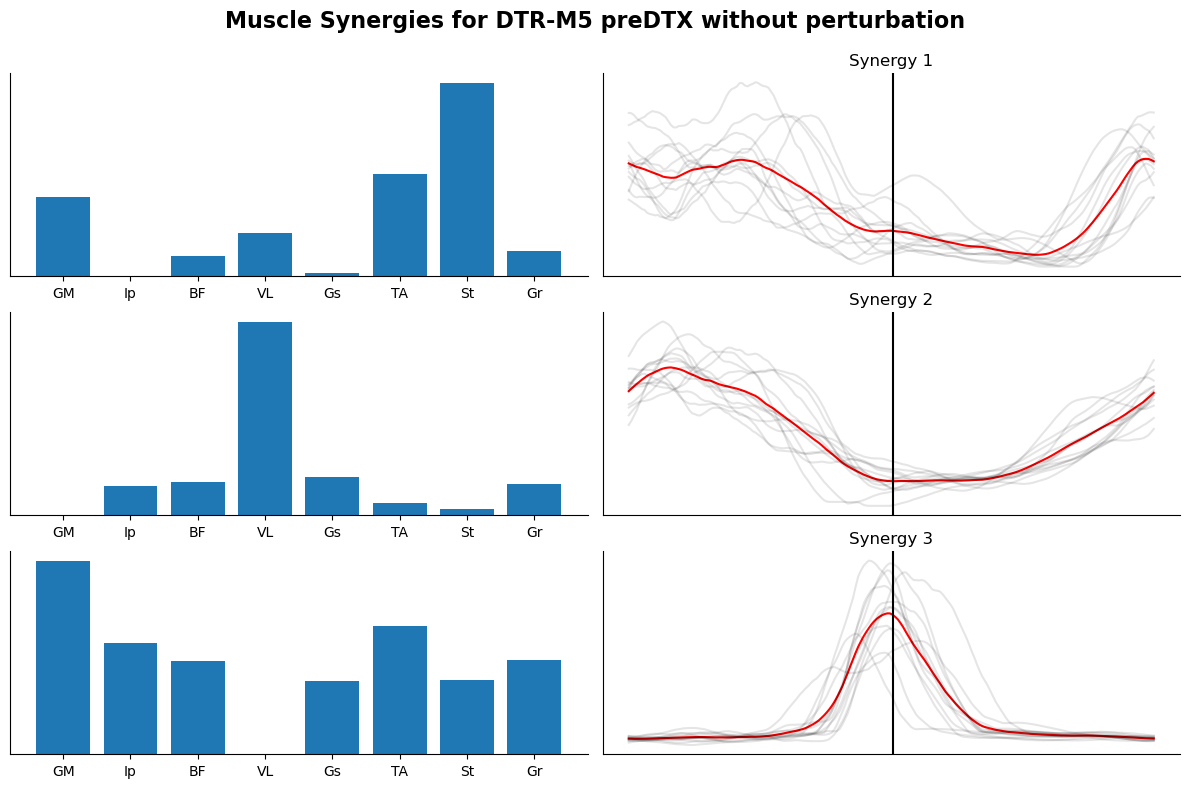

/home/kenzie_mackinnon/miniforge/envs/lab/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


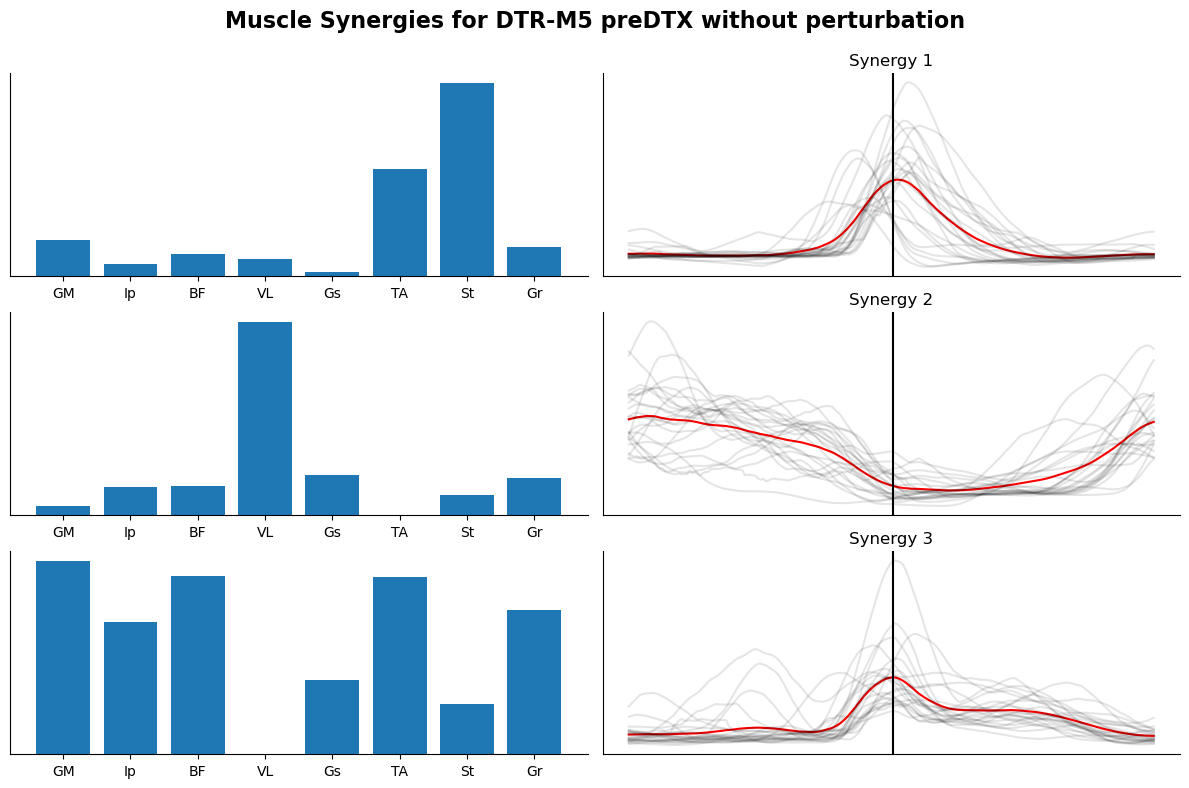

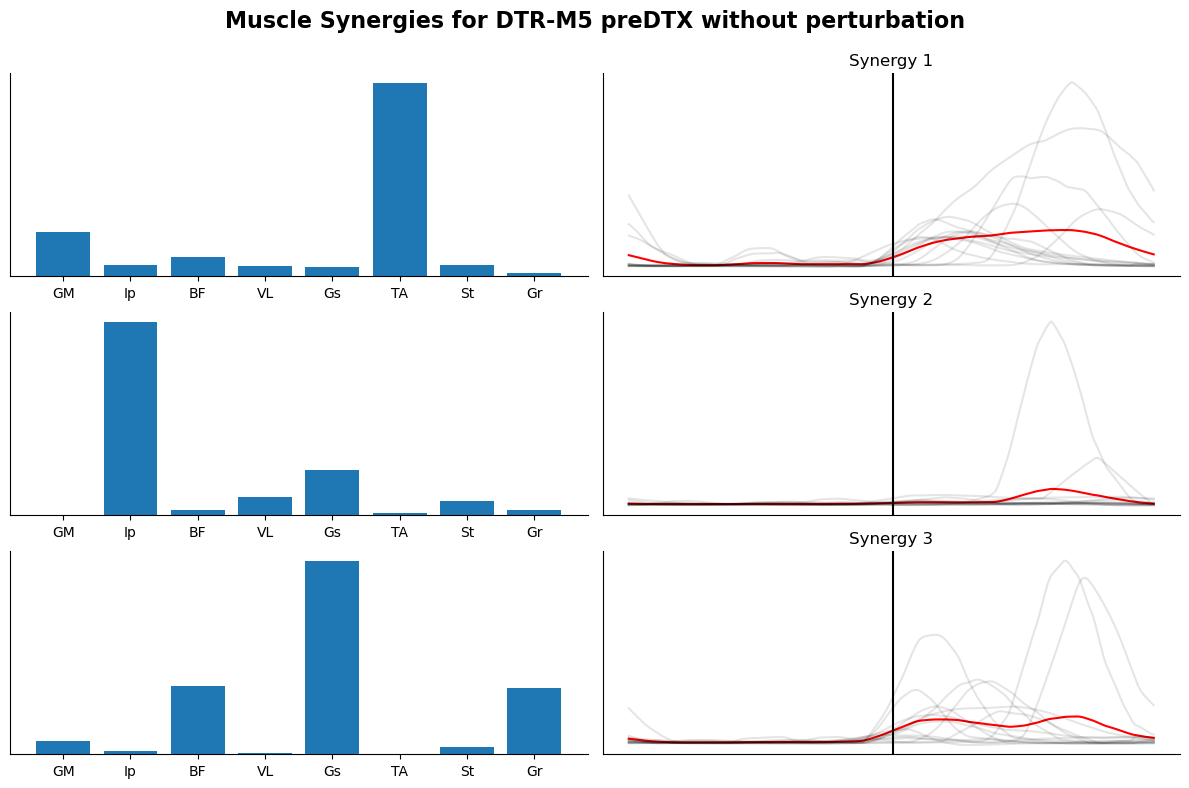

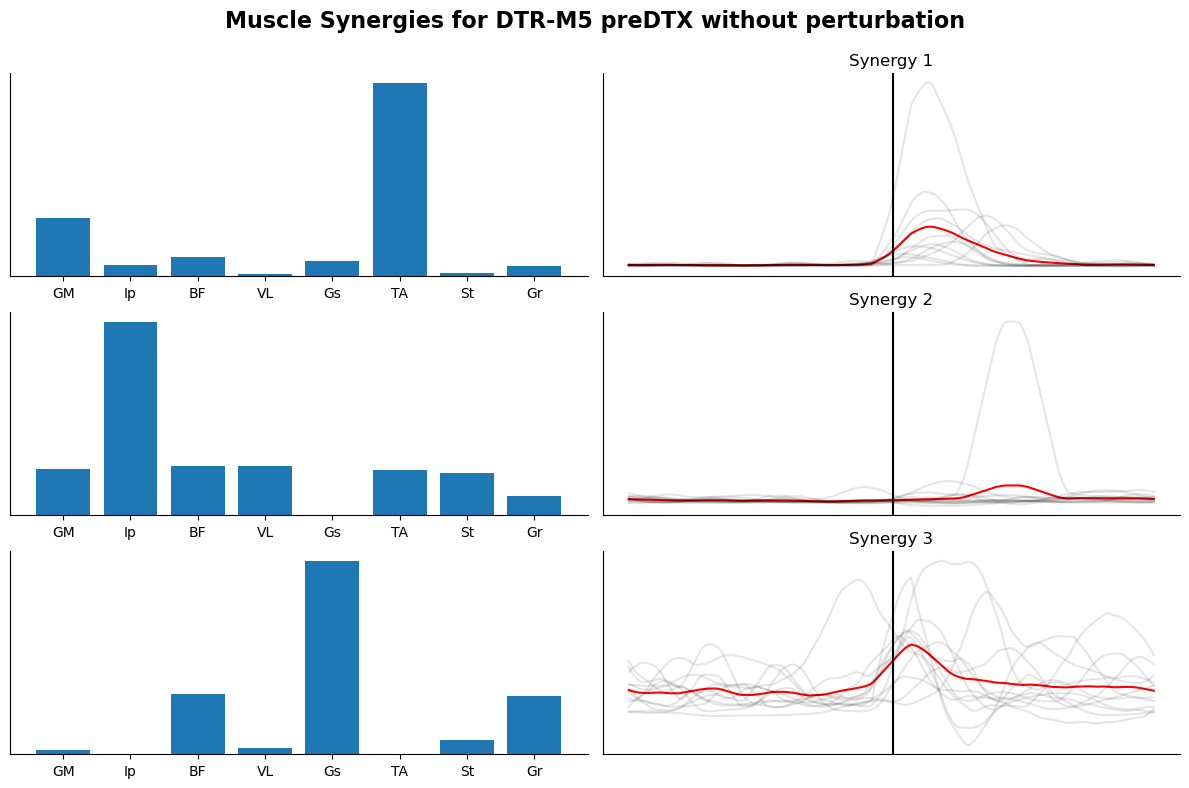

Synergy 1
Synergy 2
Synergy 3
    Condition Perturbation State    Synergy   FWHM
0          WT   Non-Perturbation  Synergy 1   18.0
1          WT   Non-Perturbation  Synergy 1   13.0
2          WT   Non-Perturbation  Synergy 1   10.0
3          WT   Non-Perturbation  Synergy 1   17.0
4          WT   Non-Perturbation  Synergy 1   10.0
..        ...                ...        ...    ...
277   PostDTX       Perturbation  Synergy 3  200.0
278   PostDTX       Perturbation  Synergy 3   76.0
279   PostDTX       Perturbation  Synergy 3  200.0
280   PostDTX       Perturbation  Synergy 3  165.0
281   PostDTX       Perturbation  Synergy 3  114.0

[282 rows x 4 columns]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreDTX_Non-Perturbation vs. PreDTX_Perturbation: t-test independent samples, P_val:3.011e-12 t=1.040e+01
WT_Non-Perturbation vs. WT_Perturbati

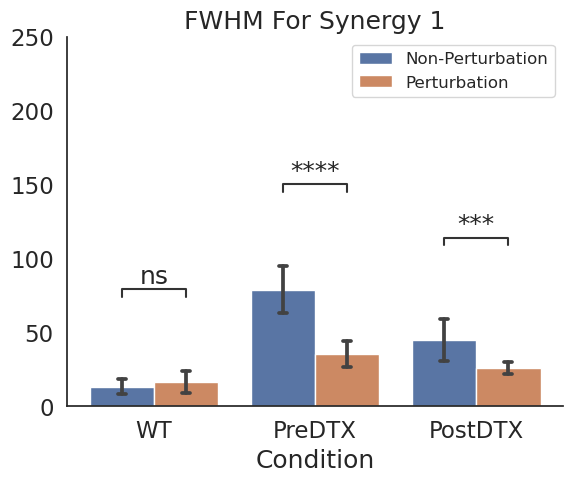

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreDTX_Non-Perturbation vs. PreDTX_Perturbation: t-test independent samples, P_val:5.308e-01 t=6.331e-01
WT_Non-Perturbation vs. WT_Perturbation: t-test independent samples, P_val:5.935e-02 t=-1.963e+00
PostDTX_Non-Perturbation vs. PostDTX_Perturbation: t-test independent samples, P_val:8.827e-01 t=-1.491e-01


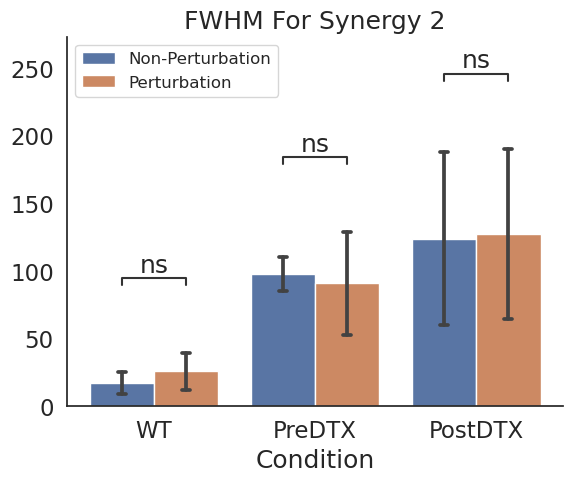

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PreDTX_Non-Perturbation vs. PreDTX_Perturbation: t-test independent samples, P_val:6.803e-06 t=-5.283e+00
WT_Non-Perturbation vs. WT_Perturbation: t-test independent samples, P_val:5.496e-03 t=-3.000e+00
PostDTX_Non-Perturbation vs. PostDTX_Perturbation: t-test independent samples, P_val:6.853e-05 t=-4.803e+00


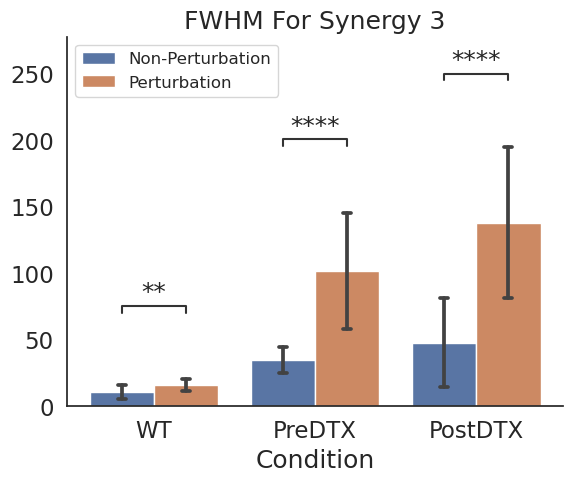

In [2]:
# ================
# Synergy analysis
# ================

synergy_selection = 3

# Title Names
title_names = [
    "Muscle Synergies for DTR-M5 preDTX without perturbation",
    "Muscle Synergies for DTR-M5 preDTX without perturbation",
    "Muscle Synergies for DTR-M5 preDTX without perturbation",
    "Muscle Synergies for DTR-M5 preDTX without perturbation",

]

# Normalized Data List
conditions_normalized_dtr = [
    './norm-emg-preDTX-100.csv',
    './norm-emg-preDTX-per.csv',
    './norm-postdtx-non.csv',
    './norm-postdtx-per.csv',
]

# Cleaned up Primitives
conditions_primitives_dtr = [
    './predtx-non-primitives-test.txt',
    './predtx-per-primitives-test.txt',
    './postdtx-non-primitives.txt',
    './postdtx-per-primitives.txt',
]

mp.show_synergies('./norm-wt-m1-non.csv', './wt-m1-non-primitives.txt', synergy_selection, "/Users/kenzie_mackinnon/Downloads/synergies_non_test.jpg")
mp.show_synergies('./norm-wt-m1-per.csv', './wt-m1-per-primitives.txt', synergy_selection, "/Users/kenzie_mackinnon/Downloads/synergies_per_test.jpg")

for i in range(len(conditions_normalized_dtr)):
    mp.show_synergies_dtr(conditions_normalized_dtr[i], conditions_primitives_dtr[i], synergy_selection, title_names[i])

# ================================
# Full Width Half Maximum Analysis
# ================================

conditions = [
    './CoM-M1/primitives-com-m1-non.csv',
    './predtx-non-primitives-test.txt',
    './postdtx-non-primitives.txt',
    './CoM-M1/primitives-com-m1-per.csv',
    './predtx-per-primitives-test.txt',
    './postdtx-per-primitives.txt',
]

conditions_name = ["WT", "PreDTX", "PostDTX", "WT", "PreDTX", "PostDTX"]
perturbation_state = ["Non-Perturbation", "Non-Perturbation", "Non-Perturbation", "Perturbation", "Perturbation", "Perturbation"]
perturbation_state_order = ["Non-Perturbation", "Perturbation"]

fwhm_df = df(columns=["Condition", "Perturbation State", "Synergy", "FWHM"])

for i in range(0, synergy_selection):
    current_synergy = i + 1
    synergy_tag = "Synergy {}".format(current_synergy)
    print(synergy_tag)
    for j in range(0, len(conditions)):
        condition_tag = conditions_name[j]
        perturbation_state_tag = perturbation_state[j]
        # print(condition_tag + " " + perturbation_state_tag)
        motor_p_data = pd.read_csv(conditions[j], header=0)
        motor_p_array = motor_p_data.to_numpy()
        fwhm_list = mp.fwhm(motor_p_array, current_synergy)
        for k in range(0, len(fwhm_list)):
            fwhm_entry = [[condition_tag, perturbation_state_tag, synergy_tag, fwhm_list[k]]]
            fwhm_df = fwhm_df._append(pd.DataFrame(fwhm_entry, columns=["Condition", "Perturbation State", "Synergy", "FWHM"]), ignore_index=True)

print(fwhm_df)
syn1_df = fwhm_df[fwhm_df["Synergy"] == "Synergy 1"]
syn2_df = fwhm_df[fwhm_df["Synergy"] == "Synergy 2"]
syn3_df = fwhm_df[fwhm_df["Synergy"] == "Synergy 3"]

# Plotting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="white", font_scale=1.5, rc=custom_params)

pairs = [
    [("WT", "Non-Perturbation"), ("WT", "Perturbation")],
    [("PreDTX", "Non-Perturbation"), ("PreDTX", "Perturbation")],
    [("PostDTX", "Non-Perturbation"), ("PostDTX", "Perturbation")],
]

# Plot for Synergy 1
plot_params = {
    "data": syn1_df,
    "x": "Condition",
    "y": "FWHM",
    "hue": "Perturbation State",
    "hue_order": perturbation_state_order,
}

plt.title("FWHM For Synergy 1")
plt.ylim(0, 1)
plt.ylim(0, 250)
syn1 = sns.barplot(**plot_params, ci="sd", capsize=0.05)
plt.ylabel('')
plt.legend(loc='best', fontsize=12)
annotator = Annotator(syn1, pairs, **plot_params)
annotator.new_plot(syn1, pairs, plot="barplot", **plot_params)
annotator.configure(hide_non_significant=False, test="t-test_ind", text_format="star", loc="inside")
annotator.apply_test().annotate(line_offset_to_group=0.2, line_offset=0.1)
plt.show()

# Plot for Synergy 2
plot_params = {
    "data": syn2_df,
    "x": "Condition",
    "y": "FWHM",
    "hue": "Perturbation State",
    "hue_order": perturbation_state_order,
}
plt.title("FWHM For Synergy 2")
plt.ylim(0, 250)
syn2 = sns.barplot(**plot_params, ci="sd", capsize=0.05)
plt.ylabel('')
plt.legend(loc='best', fontsize=12)
annotator = Annotator(syn2, pairs, **plot_params)
annotator.new_plot(syn2, pairs, plot="barplot", **plot_params)
annotator.configure(hide_non_significant=False, test="t-test_ind", text_format="star", loc="inside")
annotator.apply_test().annotate(line_offset_to_group=0.2, line_offset=0.1)
plt.show()

# Plot for Synergy 3
plot_params = {
    "data": syn3_df,
    "x": "Condition",
    "y": "FWHM",
    "hue": "Perturbation State",
    "hue_order": perturbation_state_order,
}

plt.title("FWHM For Synergy 3")
plt.ylim(0, 250)
syn3 = sns.barplot(**plot_params, ci="sd", capsize=0.05)
plt.ylabel('')
plt.legend(loc='best', fontsize=12)
annotator = Annotator(syn3, pairs, **plot_params)
annotator.new_plot(syn3, pairs, plot="barplot", **plot_params)
annotator.configure(hide_non_significant=False, test="t-test_ind", text_format="star", loc="inside")
annotator.apply_test().annotate(line_offset_to_group=0.2, line_offset=0.1)
plt.show()
